![](https://i.ibb.co/7t6wKN7/000.png)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Exploratory Data Analysis  📚</b>
</div>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>EDA Libraries ⚒</b>
</div>

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd 
from tqdm import tqdm, notebook 
from collections import Counter
import warnings 

In [3]:
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Pathes 🧶</b>
</div>

In [4]:
# Files 
__SAMPLE_SBMISSION_PATH = "/kaggle/input/hubmap-hacking-the-human-vasculature/sample_submission.csv"
__TILE_META_PATH = "/kaggle/input/hubmap-hacking-the-human-vasculature/tile_meta.csv"
__WSI_META_PATH = "/kaggle/input/hubmap-hacking-the-human-vasculature/wsi_meta.csv"
__ANNOTATION_PATH = "/kaggle/input/hubmap-hacking-the-human-vasculature/polygons.jsonl"
__DATASET_CONFIG_PATH = "/kaggle/working/classes_config.csv" # Custom file

# Folders
__TRAIN_PATH = "/kaggle/input/hubmap-hacking-the-human-vasculature/train"
__TEST_PATH = "/kaggle/input/hubmap-hacking-the-human-vasculature/test"

In [5]:
sample_submission = pd.read_csv(__SAMPLE_SBMISSION_PATH)
tile_meta = pd.read_csv(__TILE_META_PATH)
wsi_meta = pd.read_csv(__WSI_META_PATH)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Sample submission 📩</b>
</div>

In [6]:
sample_submission

,id,height,width,prediction_string
0,72e40acccadf,512,512,0 1.0 eNoLTDAwyrM3yI/PMwcAE94DZA==


<div class="sc-dmLtQE jWwnsR"><p>
<h2>Submission File</h2>
<p>For each image in the test set, you must predict a list of instance segmentation masks and their associated detection score (<code>Confidence</code>). The <code>submission.csv</code> file uses the following format:</p>
<pre><code><span class="hljs-attribute">id</span>,height,width,prediction_string
<span class="hljs-attribute">72e40acccadf</span>,<span class="hljs-number">512</span>,<span class="hljs-number">512</span>,<span class="hljs-number">0</span> <span class="hljs-number">1</span>.<span class="hljs-number">0</span> eNoLTDAwyrM3yI/PMwcAE94DZA==
</code></pre>
<p>where <code>prediction_string</code> has the format <code>0 {confidence} {EncodedMask}</code>. Note that the metric has several "boilerplate" values needed to adapt it to this competition; namely, the <code>height</code>, <code>width</code>, and the leading <code>0</code> in <code>prediction_string</code>, which ordinarily is a class label.</p>
<p>Separate prediction strings multiple instance masks for the same image with a space, like so:</p>
<pre><code><span class="hljs-attribute">id</span>,height,width,prediction_string
<span class="hljs-attribute">72e40acccadf</span>,<span class="hljs-number">512</span>,<span class="hljs-number">512</span>,<span class="hljs-number">0</span> <span class="hljs-number">1</span>.<span class="hljs-number">0</span> eNoLTDAwyrM3yI/PMwcAE94DZA== <span class="hljs-number">0</span> <span class="hljs-number">0</span>.<span class="hljs-number">5</span> eAndnnDS1A/mdmkE35Ek9d
</code></pre>
<p>The binary segmentation masks are <a rel="noreferrer nofollow" target="_blank" href="https://en.wikipedia.org/wiki/Run-length_encoding">run-length encoded</a> (RLE), <a rel="noreferrer nofollow" target="_blank" href="https://en.wikipedia.org/wiki/Zlib">zlib</a> compressed, and <a rel="noreferrer nofollow" target="_blank" href="https://en.wikipedia.org/wiki/Base64">base64</a> encoded to be used in text format as <code>EncodedMask</code>. Specifically, we use the Coco masks RLE encoding/decoding (see the <code>encode</code> method of <a rel="noreferrer nofollow" target="_blank" href="http://cocodataset.org/#download">COCO’s mask API</a>), the zlib compression/decompression (<a rel="noreferrer nofollow" target="_blank" href="https://www.ietf.org/rfc/rfc1950.txt">RFC1950</a>), and vanilla base64 encoding.</p>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Tile meta</b>
</div>

In [7]:
tile_meta

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008
...,...,...,...,...,...
7028,ffd37b5c6598,13,3,13824,21504
7029,ffd3d193c71e,3,2,7680,16896
7030,ffd77e2517af,13,3,15872,28160
7031,ffe3cbb81f72,10,3,15456,23000


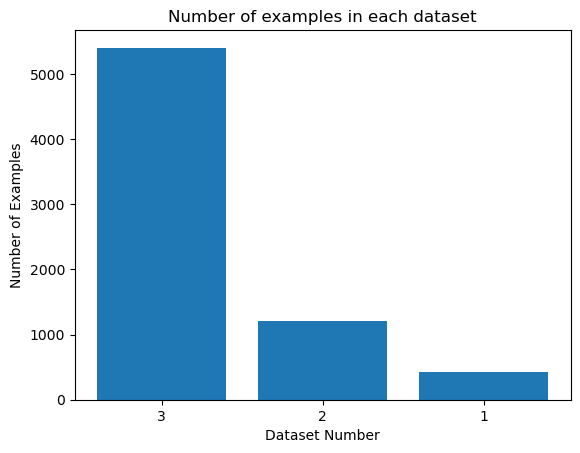

In [8]:
dataset_count = tile_meta['dataset'].value_counts()

plt.bar(list(map(str, dataset_count.index)), dataset_count.values)

plt.xlabel('Dataset Number')
plt.ylabel('Number of Examples')
plt.title('Number of examples in each dataset')

plt.show()

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Wsi meta</b>
</div>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #f0c7c7; font-family:verdana; color: #a63c3c; border: 2px #a63c3c solid">
    <br>Whole Slide Images (WSIs), also known as virtual slides or digital slides, refer to high-resolution digital representations of entire histopathology glass slides. These slides are typically generated by scanning glass slides using specialized slide scanners.<br>
    <br>We should expect 14 unique sources of WSIs where 5 have been used for annotations by either a expert or non expert which then get put into dataset 1 and 2 respectively, and the other 9 correspond to WSIs for dataset 3 which have no annotations. Although we should expect 14 we see that there is only thirteen. A keen eye would see that number 5 is missing. This is probably because the 5th WSI belongs to the first dataset and was removed from the dataset to be used as the test set.<br>
</div>

## Distribution of WSI by datasets
![](https://i.ibb.co/6Y1zJvv/001.png)

## Legend 
![](https://i.ibb.co/gghC5LZ/002.png)

In [9]:
wsi_meta

,source_wsi,age,sex,race,height,weight,bmi
0,1,58,F,W,160.0,59.0,23.0
1,2,56,F,W,175.2,139.6,45.5
2,3,73,F,W,162.3,87.5,33.2
3,4,53,M,B,166.0,73.0,26.5


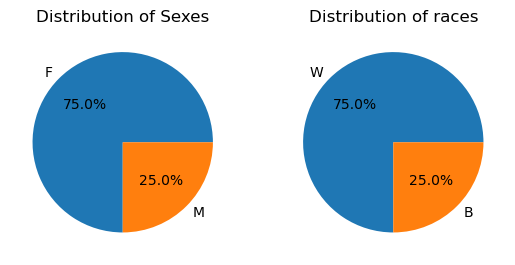

In [10]:
sex_counts = wsi_meta.sex.value_counts()
race_counts = wsi_meta.race.value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')
ax1.set_title("Distribution of Sexes")

ax2.pie(race_counts.values, labels=race_counts.index, autopct='%1.1f%%')
ax2.set_title("Distribution of races")

plt.show()

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Polygons-annotation 🎯</b>
</div>

****
![](https://i.ibb.co/z4BQ2jH/Screenshot-from-2023-06-11-15-19-16.png)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #f0c7c7; font-family:verdana; color: #a63c3c; border: 2px #a63c3c solid">
Polygonal segmentation masks in JSONL format, available for Dataset 1 and Dataset 2. Each line gives JSON annotations for a single image with:<ul>
<li><code>id</code> Identifies the corresponding image in <strong>train/</strong></li>
<li><code>annotations</code>  A list of mask annotations with:</li>
<li><code>type</code> Identifies the type of structure annotated:<ul>
<li><code>blood_vessel</code> The target structure. Your goal in this competition is to predict these kinds of masks on the test set.</li>
<li><code>glomerulus</code> A capillary ball structure in the kidney. These parts of the images were excluded from blood vessel annotation. You should ensure none of your test set predictions occur within glomerulus structures as they will be counted as false positives. Annotations are provided for test set tiles.</li>
<li><code>unsure</code> A structure the expert annotators cannot confidently distinguish as a blood vessel.</li></ul></li>
<li><code>coordinates</code> A list of polygon coordinates defining the segmentation mask.</li></ul></li>
</div>

****

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Setup Pipeline ⚙️</b>
</div>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #f0c7c7; font-family:verdana; color: #a63c3c; border: 2px #a63c3c solid">
    And now we will install pycocotools. 
    <br>This tool is needed for encoding masks and their subsequent evaluation.<br>
    We will also set a random number generator for all frameworks.
</div>

In [11]:
import torch
import random

import shutil
import os
import sys
from colorama import Fore

In [12]:
class SetupPipline:   
    @staticmethod
    def __pycocotools() -> None:
        if not os.path.exists("/kaggle/working/packages"):
            shutil.copytree("/kaggle/input/hubmap-tools-ultralytics-and-pycocotools/pycocotools/pycocotools", "/kaggle/working/packages")
            os.chdir("/kaggle/working/packages/pycocotools-2.0.6/")
            os.system("python setup.py install")
            os.system("pip install . --no-index --find-links /kaggle/working/packages/")
            os.chdir("/kaggle/working")

    @staticmethod
    def seed_everything(seed: int) -> None:
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
    
    def __call__(self, seed: int = 42, pycoco: bool = True) -> None:
        if pycoco:
            self.__pycocotools()
        if seed:
            self.seed_everything(seed)

In [13]:
%%capture
setup = SetupPipline()
SEED: int = 42
setup(seed=SEED, pycoco=True)

running install


/opt/conda/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(


running bdist_egg
running egg_info
writing pycocotools.egg-info/PKG-INFO
writing dependency_links to pycocotools.egg-info/dependency_links.txt
writing requirements to pycocotools.egg-info/requires.txt
writing top-level names to pycocotools.egg-info/top_level.txt
reading manifest file 'pycocotools.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'pycocotools.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib.linux-x86_64-3.10
creating build/lib.linux-x86_64-3.10/pycocotools
copying pycocotools/cocoeval.py -> build/lib.linux-x86_64-3.10/pycocotools
copying pycocotools/__init__.py -> build/lib.linux-x86_64-3.10/pycocotools
copying pycocotools/mask.py -> build/lib.linux-x86_64-3.10/pycocotools
copying pycocotools/coco.py -> build/lib.linux-x86_64-3.10/pycocotools
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c


/opt/conda/lib/python3.10/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /kaggle/working/packages/pycocotools-2.0.6/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


building 'pycocotools._mask' extension
creating build/temp.linux-x86_64-3.10
creating build/temp.linux-x86_64-3.10/common
creating build/temp.linux-x86_64-3.10/pycocotools
gcc -pthread -B /opt/conda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/conda/include -fPIC -O2 -isystem /opt/conda/include -fPIC -I/opt/conda/lib/python3.10/site-packages/numpy/core/include -I./common -I/opt/conda/include/python3.10 -c ./common/maskApi.c -o build/temp.linux-x86_64-3.10/./common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99


./common/maskApi.c: In function ‘rleToBbox’:
./common/maskApi.c:151:32: warning: unused variable ‘xp’ [-Wunused-variable]
  151 |     uint h, w, xs, ys, xe, ye, xp, cc; siz j, m;
      |                                ^~
./common/maskApi.c: In function ‘rleFrPoly’:
./common/maskApi.c:197:3: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
  197 |   for(j=0; j<k; j++) x[j]=(int)(scale*xy[j*2+0]+.5); x[k]=x[0];
      |   ^~~
./common/maskApi.c:197:54: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
  197 |   for(j=0; j<k; j++) x[j]=(int)(scale*xy[j*2+0]+.5); x[k]=x[0];
      |                                                      ^
./common/maskApi.c:198:3: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
  198 |   for(j=0; j<k; j++) y[j]=(int)(scale*xy[j*2+1]+.5); y[k]=y[0];
      |   ^~~
./common/maskApi.c:198:54: note: ...this statement, but the latter is misleadingly indented as if it wer

gcc -pthread -B /opt/conda/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/conda/include -fPIC -O2 -isystem /opt/conda/include -fPIC -I/opt/conda/lib/python3.10/site-packages/numpy/core/include -I./common -I/opt/conda/include/python3.10 -c pycocotools/_mask.c -o build/temp.linux-x86_64-3.10/pycocotools/_mask.o -Wno-cpp -Wno-unused-function -std=c99


pycocotools/_mask.c: In function ‘__pyx_pf_11pycocotools_5_mask_12iou’:
pycocotools/_mask.c:6140:31: warning: comparison of integer expressions of different signedness: ‘Py_ssize_t’ {aka ‘long int’} and ‘siz’ {aka ‘long unsigned int’} [-Wsign-compare]
 6140 |     if (unlikely(!((__pyx_t_8 == __pyx_v_n) != 0))) {
      |                               ^~
pycocotools/_mask.c:944:43: note: in definition of macro ‘unlikely’
  944 |   #define unlikely(x) __builtin_expect(!!(x), 0)
      |                                           ^


gcc -pthread -B /opt/conda/compiler_compat -shared -Wl,--allow-shlib-undefined -Wl,-rpath,/opt/conda/lib -Wl,-rpath-link,/opt/conda/lib -L/opt/conda/lib -Wl,--allow-shlib-undefined -Wl,-rpath,/opt/conda/lib -Wl,-rpath-link,/opt/conda/lib -L/opt/conda/lib build/temp.linux-x86_64-3.10/./common/maskApi.o build/temp.linux-x86_64-3.10/pycocotools/_mask.o -o build/lib.linux-x86_64-3.10/pycocotools/_mask.cpython-310-x86_64-linux-gnu.so
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.10/pycocotools/cocoeval.py -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.10/pycocotools/__init__.py -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.10/pycocotools/_mask.cpython-310-x86_64-linux-gnu.so -> build/bdist.linux-x86_64/egg/pycocotools
copying build/lib.linux-x86_64-3.10/pycocotools/mask.py -> build/bdist.linux-x86_64/egg/pycocotools
copying

zip_safe flag not set; analyzing archive contents...
pycocotools.__pycache__._mask.cpython-310: module references __file__
error: [Errno 2] No such file or directory: '/opt/conda/lib/python3.10/site-packages/numpy-1.24.3.dist-info/METADATA'


Looking in links: /kaggle/working/packages/
Processing /kaggle/working/packages/pycocotools-2.0.6
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp310-cp310-linux_x86_64.whl size=102202 sha256=a659b75d38dcd5f81d8121b27b95c99d297b1825ea18ed503fe2c4bf059089e2
  Stored in directory: /root/.cache/pip/wheels/b7/83/32/99474500256e64154dfc568319411b6ff49e96e50f30d9474f
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6


<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Dataset libraries</b>
</div>

In [14]:
from torch.utils.data import Dataset
import cv2
import yaml
import json
from PIL import Image

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Dataset config</b>
</div>

In [15]:
dataset_config = {
    "background": {
        "apply_mask": None,
        "label": 0,
        "rgb": (0, 0, 0),
        "loss_weight": None
    },
    "blood_vessel": {
        "apply_mask": True,
        "label": 1,
        "rgb": (255, 8, 8),
        "loss_weight": None
    },
    "glomerulus": {
        "apply_mask": True,
        "label": 2,
        "rgb": (8, 12, 255),
        "loss_weight": None
    },
    "unsure": {
        "apply_mask": True,
        "label": 3,
        "rgb": (8, 255, 20),
        "loss_weight": None
    }
}

In [16]:
def write_config(data: dict[dict, ...], path: str) -> None:
    with open(path, mode="w") as f:
        yaml.safe_dump(stream=f, data=data)
        
write_config(dataset_config, __DATASET_CONFIG_PATH)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Dataset 🪢</b>
</div>

In [17]:
from typing import Tuple

class HuBMAPDataset(Dataset):
    def __init__(self, 
                 annotation_path: str,
                 image_path: str, 
                 config_path: str):
        self.__image_path = image_path
        self.__samples = self.parse_jsonl(annotation_path)
        self.__config = self.load_config(config_path)
    
    def __len__(self) -> int:
        return len(self.__samples)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, np.ndarray]:
        image = self.__get_image(idx)
        mask = self.__get_mask(idx)
    
        image = torch.tensor(image, dtype=torch.uint8).permute(2, 0, 1)
        mask = torch.tensor(mask, dtype=torch.float32) 
    
        return image, mask

        
    @staticmethod
    def parse_jsonl(path: str) -> list[dict, ...]:
        with open(path, 'r') as json_file:
            jsonl_labels = [
                json.loads(line)
                for line in notebook.tqdm(
                    json_file, desc="Processing polygons", total=1633
                )
            ]
        return jsonl_labels

    @staticmethod
    def load_config(path: str) -> dict:
        with open(path, mode="r") as f:
            data = yaml.load(stream=f, Loader=yaml.SafeLoader)
        return data
    
    def __get_image_path(self, id: str) -> str:
        path = os.path.join(
            self.__image_path, f"{id}.tif"
        )
        return path
    
    def __get_image(self, idx: int) -> np.ndarray:
        id = self.__samples[idx]["id"]
        image_path = self.__get_image_path(id)
        image = Image.open(image_path)
        image = np.asarray(image)
        return image
            
    def __get_mask(self, idx: int) -> np.ndarray:
        mask = np.zeros((512, 512), dtype=np.uint8)
        annotations = self.__samples[idx]["annotations"]
        
        for vessel in annotations:
            vessel_type = vessel["type"] 
            config = self.__config[vessel_type]
            
            if config["apply_mask"]:
                coordinates = np.array(vessel["coordinates"])
                mask = cv2.fillPoly(
                    mask, pts=coordinates,
                    color=config["rgb"]
                )
        return mask

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Let's check dataset</b>
</div>

In [18]:
dataset = HuBMAPDataset(__ANNOTATION_PATH, __TRAIN_PATH, __DATASET_CONFIG_PATH)

Processing polygons:   0%|          | 0/1633 [00:00<?, ?it/s]

TypeError: Invalid shape (3, 512, 512) for image data

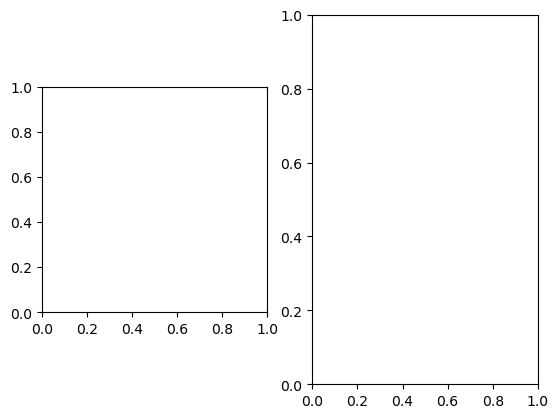

In [19]:
image, mask = dataset[0]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(image)
ax2.imshow(mask)
plt.show()

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Train </b>
</div>

In this script, you need to define your own model architecture in the MyModel class and modify the loss function and optimizer based on your specific task. Make sure to adjust the file paths to point to your actual dataset and configuration files.

The script performs a training loop over the specified number of epochs, with a separate validation step after each epoch. It calculates and prints the average training and validation losses for monitoring the model's performance during training. Finally, the trained model is saved to a file.

Please customize the script according to your specific needs, including any additional preprocessing steps, model architecture, loss function, and optimization algorithm.

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define your model layers here
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 1, kernel_size=1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        # Implement the forward pass of your model here
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize your dataset
# annotation_path = "/kaggle/input/hubmap-hacking-the-human-vasculature/polygons.jsonl"
# image_path = "/kaggle/input/hubmap-hacking-the-human-vasculature/train/0006ff2aa7cd.tif"
# config_path = "/path/to/config.yaml"
# dataset = HuBMAPDataset(annotation_path, image_path, config_path)

#Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Define data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize your model
model = MyModel()

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0

    # Training
    model.train()
    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        
        # Convert the input tensor to float32
        images = images.float()
        
        # Convert model parameters to float32
        model.float()

        # Forward pass
        outputs = model(images)

        # Calculate loss
        loss = criterion(outputs, masks)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    # Validation
    model.eval()
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)
            
            # Convert the input tensor to float32
            images = images.float()
            
             # Convert model parameters to float32
            model.float()

            # Forward pass
            outputs = model(images)

            # Calculate loss
            loss = criterion(outputs, masks)

            val_loss += loss.item() * images.size(0)

    # Calculate average losses
    train_loss /= len(train_dataset)
    val_loss /= len(val_dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


RuntimeError: size mismatch (got input: [32, 1, 256, 256] , target: [32, 512, 512]

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define your model layers here
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        # Implement the forward pass of your model here
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize your dataset
# annotation_path = "/kaggle/input/hubmap-hacking-the-human-vasculature/polygons.jsonl"
# image_path = "/kaggle/input/hubmap-hacking-the-human-vasculature/train/0006ff2aa7cd.tif"
# config_path = "/path/to/config.yaml"
# dataset = HuBMAPDataset(annotation_path, image_path, config_path)

#Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Define data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize your model
model = MyModel()

# Define your loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0

    # Training
    model.train()
    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        
        # Convert the input tensor to float32
        images = images.float()

        # Forward pass
        outputs = model(images)

        # Resize the output tensor to match the target mask's size
        outputs = F.interpolate(outputs, size=masks.shape[2:], mode='bilinear', align_corners=False)

        # Calculate loss
        loss = criterion(outputs, masks)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
    # Validation
    model.eval()
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)

            # Convert the input tensor to float32
            images = images.float()

            # Forward pass
            outputs = model(images)

            # Resize the output tensor to match the target mask's size
            outputs = F.interpolate(outputs, size=masks.shape[2:], mode='bilinear', align_corners=False)

            # Calculate loss
            loss = criterion(outputs, masks)

            val_loss += loss.item() * images.size(0)


    # Calculate average losses
    train_loss /= len(train_dataset)
    val_loss /= len(val_dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


KeyboardInterrupt: 

In [24]:
# Training loop
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0

    # Training
    model.train()
    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()

        # Convert the input tensor to float32
        images = images.float()

        # Convert model parameters to float32
        model.float()

        # Forward pass
        outputs = model(images)

        # Calculate loss
        loss = criterion(outputs, masks)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    # Validation
    model.eval()
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)

            # Convert the input tensor to float32
            images = images.float()

            # Convert model parameters to float32
            model.float()

            # Forward pass
            outputs = model(images)

            # Calculate loss
            loss = criterion(outputs, masks)

            val_loss += loss.item() * images.size(0)

    # Calculate average losses
    train_loss /= len(train_dataset)
    val_loss /= len(val_dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


KeyboardInterrupt: 

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ababaa; font-family:verdana; color: #fffFFF; border: 2px #ababab solid">
    <b>Submission 💌</b>
</div>

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #f0c7c7; font-family:verdana; color: #a63c3c; border: 2px #a63c3c solid">
    <b>id, height, width, prediction_string</b>
    <ul style="font-size:20px; font-family:verdana; line-height: 1.7em">
        <li>id - identifier of the image that came to the input of the neural network.</li>
        <li>height - image height (constant value equal to 512).</li> 
        <li>width - image width (constant value equal to 512).</li> 
        <li>prediction_string:
            <ul style="font-size:20px; font-family:verdana; line-height: 1.7em">
                <li>label - label class constant value equal to 0 (at least as I understand it, correct me if I'm wrong)</li>
                <li>confidence - the confidence of the model that this object or instance belongs to the target class. That is, your model will give a mask at the output, where each mask will have the probability that this particular mask belongs to the desired class. It's like the probability of a model belonging to an object to a class. In fact, this is a probabilistic membership score that always appears when it comes to classification.</li>  
            </ul>
        </li> 
    </ul>
</div>



In [ ]:
import base64
import numpy as np
import torch
from pycocotools import _mask as coco_mask
import typing as t
import zlib
import pandas as pd
import torchvision.transforms as T

In [ ]:
class EncodeBinaryMask:
    @staticmethod
    def __checking_mask(mask: np.ndarray) -> np.ndarray:
        if mask.dtype != np.bool:
            raise ValueError(
                "expects a binary mask, received dtype == %s" %
                mask.dtype
            )
        return mask

    @staticmethod
    def __convert_mask(mask: np.ndarray):
        mask_to_encode = mask.astype(np.uint8)
        mask_to_encode = np.asfortranarray(mask_to_encode)
        return mask_to_encode

    @staticmethod
    def __compress_encode(encoded_mask) -> t.Text:
        binary_str = zlib.compress(encoded_mask, zlib.Z_BEST_COMPRESSION)
        base64_str = base64.b64encode(binary_str)
        return base64_str

    def __call__(self, mask: np.ndarray) -> t.Text:
        mask = self.__checking_mask(mask)
        mask_to_encode = self.__convert_mask(mask)
        encoded_mask = coco_mask.encode(mask_to_encode)[0]["counts"]
        base64_str = self.__compress_encode(encoded_mask)
        return base64_str


In [ ]:
class Submission:
    def __init__(self, dirpath: str, model: torch.nn.Module):
        self.__eval_transforms = self.get_transforms()
        self.__model = model
        self.__encoder = EncodeBinaryMask()
        self.__dirpath = dirpath
        self.__filenames = os.listdir(dirpath)
        
        self.__submission_dict = {
            "id": [],
            "height": [],
            "width": [],
            "prediction_string": []
        }
        
        self.submission = None
    
    @staticmethod
    def get_transforms():
        return T.Compose([
            T.ToTensor(),
            T.Resize(size=(512, 512)),
            T.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.__filenames)

    def __get_columns(self) -> None:
        for filename in self.__filenames:
            path = self.__get_image_path(filename)
            image = self.__get_image(path)
            masks = self.__forward(image)
            identifier, height, width, prediction_string = self.__get_cells(filename, masks)
            self.__update_columns(identifier, height, width, prediction_string)

    def __update_columns(self, identifier: str, height: int, width: int, prediction_string: str) -> None:
        self.__submission_dict["id"].append(identifier)
        self.__submission_dict["height"].append(height)
        self.__submission_dict["width"].append(width)
        self.__submission_dict["prediction_string"].append(prediction_string)

    def __get_cells(self, filename: str, masks: list):
        prediction_string = ""
        prediction_string = self.__get_prediction_string(masks, prediction_string)
        identifier = filename.split(".")[0]
        height, width = mask.shape
        return identifier, height, width, prediction_string

    def __get_prediction_string(self, masks: list, prediction_string: str) -> str:
        """
        If the neural network did not find the target structure,
        then we will return an empty prediction_string.
        
        However, the columns:
            id, height, width - must be present for all test images!!!
        """
        
        if masks:
            for outputs in masks:
                mask = outputs["mask"].detach().permute(1,2,0).cpu().numpy()
                mask = np.where(mask > 0.5, 1, 0).astype(np.bool)
                base64_str = self.__encoder(mask)
                confidence = outputs["confidence"]
                prediction_string += f"0 {confidence} {base64_str.decode('utf-8')} "
        return prediction_string

    def __get_image_path(self, filename: str) -> str:
        return os.path.join(
            self.__dirpath, filename
        )

    def __get_image(self, path: str) -> torch.Tensor:
        image = Image.open(path)
        image = np.asarray(image)
        image = self.__eval_transforms(image)
        return image

    # You must implement this function to work with your custom neural network!
    def __forward(self, image: torch.tensor) ->list:
        """
        This fuction should return list with masks & confidence.
        And each mask we shoulde encode (see EncodeBinaryMask & sample_submission file) 
        
        outputs <- model(image) 
        outputs -> [
                    {"mask": mask1, "confidence": confidence1},
                    {"mask": mask2, "confidence": confidence2}, 
                    ...,
                    {"mask": maskN, "confidence": confidenceN}
                   ]
                                  
        Example:
        """
        masks = self.__model(image) # Mask must have shape 1x512x512
        return masks 

    def submit(self) -> None:
        if not self.submission:
            self.__get_columns()
            self.submission = pd.DataFrame(self.__submission_dict)
            self.submission = self.submission.set_index('id')
            self.submission.to_csv("submission.csv")


<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Sample model</b>
</div>

In [ ]:
class MyBestModel:
    @staticmethod
    def generate_masks(num_masks: int) -> list[dict, ...]:
        masks = []
        for _ in range(num_masks):
            mask = torch.randint(0, 2, (1, 512, 512))
            confidence = round(float(torch.rand(1)[0]), 2)
            masks.append({"mask": mask, "confidence": confidence})
        return masks
        
    def __call__(self, image) -> list[dict, ...]:
        num_masks = torch.randint(1, 5, (1, 1))
        masks = self.generate_masks(num_masks)
        return masks

In [ ]:
model = MyBestModel()

In [ ]:
sub = Submission(dirpath=__TEST_PATH, model=model)
sub.submit()

In [ ]:
sub.submission.head()

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffa3a3; font-family:verdana; color: #8a0f0f; border: 2px #ff0303 solid">
    <b>Good luck winning the competition! 🥇</b>
    <br>I hope this work will help you not to waste too much time and you will quickly be able to understand the data and start the competition. Good luck, friend 🙃<br>
</div>

![](https://media.tenor.com/BP2ZMnJf14EAAAAC/winner-winner-chicken-dinner.gif)